<a href="https://colab.research.google.com/github/CatAIGeek/neural-network-challenge-2/blob/main/attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 1: Preprocessing

In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras import layers

#  Import and read the attrition data
attrition_df = pd.read_csv('https://static.bc-edx.com/ai/ail-v-1-0/m19/lms/datasets/attrition.csv')
attrition_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,94,3,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,61,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,92,2,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,56,3,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,40,3,...,3,4,1,6,3,3,2,2,2,2


In [ ]:
# Determine the number of unique values in each column.
attrition_df.nunique()

,0
Age,43
Attrition,2
BusinessTravel,3
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EnvironmentSatisfaction,4
HourlyRate,71
JobInvolvement,4


In [ ]:
# Create y_df with the Attrition and Department columns
y_df = attrition_df[['Attrition', 'Department']]
y_df.head()


,Attrition,Department
0,Yes,Sales
1,No,Research & Development
2,Yes,Research & Development
3,No,Research & Development
4,No,Research & Development


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Attrition').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Department').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Department'].value_counts()
    for x_label, grp in _df_2.groupby('Attrition')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Attrition')
_ = plt.ylabel('Department')

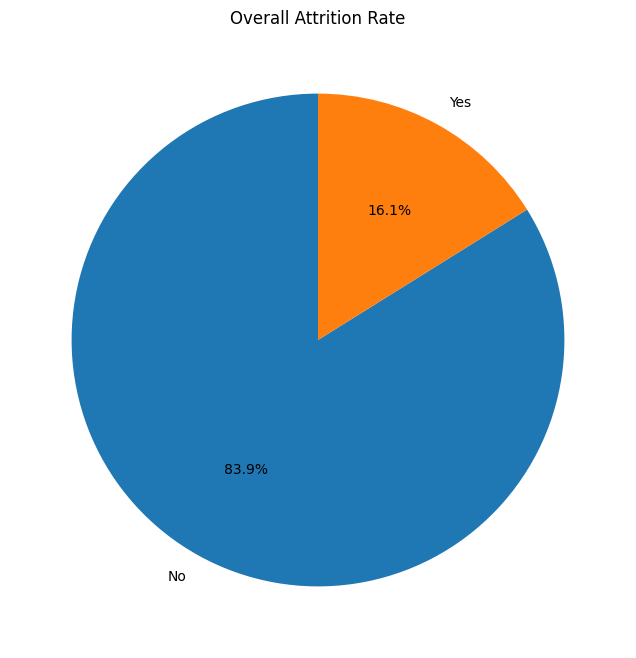

In [ ]:
# @title Overall Attrition Rate

import matplotlib.pyplot as plt

# Count the number of employees who left and stayed
attrition_counts = y_df['Attrition'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90)
_ = plt.title('Overall Attrition Rate')

In [ ]:
# prompt: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10

# Generate our categorical variable lists
attrition_cat = attrition_df.dtypes[attrition_df.dtypes == "object"].index.tolist()
# Check the number of unique values in each column
attrition_df[attrition_cat].nunique()


,0
Attrition,2
BusinessTravel,3
Department,3
EducationField,6
JobRole,9
MaritalStatus,3
OverTime,2


In [ ]:
# Create a list of at least 10 column names to use as X data
selected_columns = ['Age', 'DistanceFromHome', 'HourlyRate', 'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike',
'RelationshipSatisfaction', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Create X_df using your selected columns
X_df = attrition_df[selected_columns]

# Display the sample data
X_df.head()

# Show the data types for X_df
X_df.dtypes


,0
Age,int64
DistanceFromHome,int64
HourlyRate,int64
JobSatisfaction,int64
NumCompaniesWorked,int64
PercentSalaryHike,int64
RelationshipSatisfaction,int64
TotalWorkingYears,int64
TrainingTimesLastYear,int64
WorkLifeBalance,int64


In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)


In [ ]:
# Convert your X data to numeric data types however you see fit
# X_train = pd.get_dummies(X_train)
# X_test = pd.get_dummies(X_test)

# Add new code cells as necessary


In [ ]:
# Create a StandardScaler
scaler = StandardScaler()

# Fit the StandardScaler to the training data
X_scaler = scaler.fit(X_train)

# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [ ]:
# Create a OneHotEncoder for the Department column
from sklearn.preprocessing import OneHotEncoder

depart_encoder = OneHotEncoder(sparse_output=False)

# Fit the encoder to the training data
depart_encoder.fit(y_train[["Department"]])

# Create two new variables by applying the encoder
# to the training and testing data
y_train_encoded_d = depart_encoder.transform(y_train[["Department"]])
y_test_encoded_d = depart_encoder.transform(y_test[["Department"]])
# y_train_encoded_d, y_test_encoded


In [ ]:
# Create a OneHotEncoder for the Attrition column
from sklearn.preprocessing import OneHotEncoder

attrit_encoder = OneHotEncoder(sparse_output=False)

# Fit the encoder to the training data
attrit_encoder.fit(y_train[["Attrition"]])

# Create two new variables by applying the encoder
# to the training and testing data
y_train_encoded_a = attrit_encoder.transform(y_train[["Attrition"]])
y_test_encoded_a = attrit_encoder.transform(y_test[["Attrition"]])


## Create, Compile, and Train the Model

In [ ]:
# Find the number of columns in the X training data
num_columns = X_train_scaled.shape[1]


# Create the input layer
input_layer = layers.Input(shape=(num_columns,), name="input")

# Create at least two shared layers
shared_layer1 = layers.Dense(64, activation='relu', name="shared_1")(input_layer)
shared_layer2 = layers.Dense(32, activation='relu', name="shared_2")(shared_layer1)



In [ ]:
# Create a branch for Department
# with a hidden layer and an output layer

# Create the hidden layer
d_hidden_layer = layers.Dense(32, activation='relu', name="d_hidden_layer")(shared_layer2)

# Create the output layer
d_output_layer = layers.Dense(3, activation='sigmoid',name="d_output_layer")(d_hidden_layer)


In [ ]:
# Create a branch for Attrition
# with a hidden layer and an output layer

# Create the hidden layer
a_hidden_layer = layers.Dense(32, activation='relu', name="a_hidden_layer")(shared_layer2)



# Create the output layer
a_output_layer = layers.Dense(2, activation='sigmoid',name="a_output_layer")(a_hidden_layer)



In [ ]:
# Create the model

# Assuming 'output_layer' from ipython-input-18 is for 'Department'
#output_layer1 = d_output_layer
# Assuming 'output_layer' from ipython-input-19 is for 'Attrition'
#output_layer2 = a_output_layer
model = Model(inputs=input_layer, outputs=[d_output_layer, a_output_layer])


# Compile the model
model.compile(optimizer='adam', loss={"d_output_layer":"categorical_crossentropy","a_output_layer":'binary_crossentropy'}, metrics={"d_output_layer":"accuracy","a_output_layer":'accuracy'})


# Summarize the model
model.summary()



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)        │ (None, 14)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ shared_1 (Dense)          │ (None, 64)             │            960 │ input[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ shared_2 (Dense)          │ (None, 32)             │          2,080 │ shared_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ d_hidden_layer (Dense)    │ (None, 32)             │          1,056 │ shared_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ a_hidden_layer (Dense)    │ (None, 32)             │          1,056 │ shared_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ d_output_layer (Dense)    │ (None, 3)              │             99 │ d_hidden_layer[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ a_output_layer (Dense)    │ (None, 2)              │             66 │ a_hidden_layer[0][0]   │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 5,317 (20.77 KB)

 Trainable params: 5,317 (20.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf

# Train the model
model.fit(X_train_scaled, {"d_output_layer":y_train_encoded_d,"a_output_layer":y_train_encoded_a}, epochs=100, batch_size=32)



Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - a_output_layer_accuracy: 0.7998 - d_output_layer_accuracy: 0.5780 - loss: 1.6088
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - a_output_layer_accuracy: 0.8421 - d_output_layer_accuracy: 0.6515 - loss: 1.2654
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - a_output_layer_accuracy: 0.8372 - d_output_layer_accuracy: 0.6382 - loss: 1.2327
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a_output_layer_accuracy: 0.8339 - d_output_layer_accuracy: 0.6438 - loss: 1.1835
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a_output_layer_accuracy: 0.8323 - d_output_layer_accuracy: 0.6450 - loss: 1.1846
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a_output_layer_accuracy: 0.8473 - d_output_layer_accuracy: 0.6472 - loss: 1.1509
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - a_output_layer_accuracy: 0.8176 - d_output_layer_accuracy: 0.6333 - loss: 1.1880
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a_output_

In [ ]:
# Evaluate the model with the testing
prediction_results = model.evaluate(X_test_scaled, {"d_output_layer":y_test_encoded_d,"a_output_layer":y_test_encoded_a}, verbose=2)
print(f"Loss: {prediction_results[0]}")



10/10 - 0s - 29ms/step - a_output_layer_accuracy: 0.7857 - d_output_layer_accuracy: 0.5102 - loss: 3.2664
Loss: 3.266420841217041


In [ ]:
# Print the accuracy for both department and attrition
print(f"Department Accuracy: {prediction_results[2]}")
print(f"Attrition Accuracy: {prediction_results[1]}")


Department Accuracy: 0.5102040767669678
Attrition Accuracy: 0.7857142686843872


# Summary

In the provided space below, briefly answer the following questions.

1. Is accuracy the best metric to use on this data? Why or why not?

2. What activation functions did you choose for your output layers, and why?

3. Can you name a few ways that this model might be improved?

YOUR ANSWERS HERE

1. "Accuracy" is not the best metric to use on the data because one can not solely rely on accuracy depending on the business question. One can rely on other metrics such as "precision", "recall", or a combination of recall and precision. In using these other metrics, along with looking at the qusestions posed surrounding them, one could get a better idea of how many mistakes are being made. For example, the  Attrition Accuracy score above is 0.78, but how many mistakes are being made? What is happening in the remaining 0.22 people? So these type questions are importing in deciding whether or not to solely rely on "accuracy".


2.The activation function that was chosen for the output layers for both "Department" and "Attrition" were "sigmoid" because it can be used as an activation function in neural networks, especially in older or simpler models. It introduces non-linearity into the model, allowing the network to learn complex patterns. Additionally, in a neural network, sigmoid functions can be used in hidden layers and output layers for binary classification tasks.


3. Yes, a few ways in which the model might be improved are as follows: (1) In the Pre-processing phrase: I could choose to go back and change the number of columns. For example, the requirement called for only 10 columns, but I chose to include 14. If I change the number of columns and then re-ran the data to see if the model is improved.  
(2) In the model training phrase: I could also change the number of shared layers, and/or change the number of epochs (increase from 100 to maybe 200 epochs), and/or change the number of nodes to see if the model is improved.